# Plot Single Physical Processes
Here you can plot heatmaps along two dimensions. You set the upper and lower boundaries for up to 
three different variables and the number of bins and equally sized bins are created, where for each
the desired process is run. The results are stored in a pandas dataframe.

To get started, make sure you created a binary using the Makefile.
You can alter the Makefile to your choice. \
The variable `SEASON` can be set to
`SPRING`, `SUMMER`, `AUTUMN`, `WINTER` and `SPRING95` and sets variables used
in Hande et al. nucleation (not used by default, so you can ignore it). \
With `FLUX` the microphysics takes incoming particles from above into account (default: on).
Leave it empty, if you do not want to use it. \
`SOURCE` is used to toggle different input files (default is `WCB2`; just leave it with that).
`SAT_CALC` is set in `SOURCE` as well to calculate the saturation at every step using `qv*Rv*T/p_sat`
with `Rv` the gas constant for water vapor and `p_sat` the
saturation vapor pressure over a flat surface of liquid water (see `physical_parametrizations.h`).
If it is not on, then saturation of 1 is assumed.

To compile the code, simply type
```
make scan
```
and your binary is under `build/apps/src/scratch/scan`.

In [40]:
%%bash
rm build/apps/src/scratch/*
rm build/objects/ -r
make scan SOURCE='-DMET3D -DSB_CONV -DSB_SHAPE -DNPROCS=4' -j4

c++ -I. -DMET3D -DSB_CONV -DSB_SHAPE -DNPROCS=4 --std=c++14 -lgsl -lgslcblas -lm -DCODI_UseForcedInlines -fargument-noalias-global -ftree-loop-vectorize -lnetcdf_c++4 -lnetcdf -Wall  -DRK4ICE -DAUTUMN -DFLUX -o build/objects/src/scratch/scan.o -c src/scratch/scan.cpp
c++ -I. --std=c++14 -lgsl -lgslcblas -lm -DCODI_UseForcedInlines -fargument-noalias-global -ftree-loop-vectorize -lnetcdf_c++4 -lnetcdf -Wall  -o build/apps/src/scratch/scan build/objects/src/scratch/scan.o


src/scratch/scan.cpp: In function ‘int main(int, char**)’:
src/scratch/scan.cpp:2072:26: warning: variable ‘N2_idx’ set but not used [-Wunused-but-set-variable]
         uint32_t q2_idx, N2_idx;
                          ^~~~~~
src/scratch/scan.cpp:2076:39: warning: variable ‘coeffs’ set but not used [-Wunused-but-set-variable]
         collection_model_constants_t *coeffs;
                                       ^~~~~~
src/scratch/scan.cpp:2382:18: warning: variable ‘q2_idx’ set but not used [-Wunused-but-set-variable]
         uint32_t q2_idx, N2_idx, q1_idx, N1_idx;
                  ^~~~~~
src/scratch/scan.cpp:2382:26: warning: variable ‘N2_idx’ set but not used [-Wunused-but-set-variable]
         uint32_t q2_idx, N2_idx, q1_idx, N1_idx;
                          ^~~~~~
src/scratch/scan.cpp:2382:34: warning: variable ‘q1_idx’ set but not used [-Wunused-but-set-variable]
         uint32_t q2_idx, N2_idx, q1_idx, N1_idx;
                                  ^~~~~~
src/scratch/scan.cpp:2

Next we setup the data

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
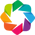

In [1]:
import holoviews as hv
import hvplot.pandas
from io import StringIO
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import panel as pn
import seaborn as sns
import subprocess as sb
from matplotlib import rcParams
from matplotlib.colors import LogNorm
import numpy as np

import scripts.latexify as latexify

hv.extension("bokeh")
pn.extension()

# figure size in inches
rcParams['figure.figsize'] = (16,10)

# Possible parameters that may be used. Change them to your liking
pressure = 100000.0 # [Pascal]
temperature = 280.0 # [Kelvin]
ascent = 0.1 # ascent rate [m/s]
qv = 1e-5
qc = 1e-5
qr = 1e-5
qs = 1e-5
qi = 1e-5
qh = 1e-5
qg = 1e-5
temp_crit = 270.0
n_inact = 0 # Number of inactive nuclei
x_i = 1e-7 # mean ice mass [1/g^3]
D_i = 1e-7 # mean ice diameter [1/cm^3]
dep_snow = 1 # deposition rate of snow
dep_ice = 1
# riming rates
rime_qc = 1 
rime_qr = 1
rime_qi = 1
rime_qs = 1
height = 2000
S = 1.0

# Possible lower and upper limits for each variable that may be used
# Note: critical values for ie riming is q > 1.0e-7
p_min = 200.0
p_max = 1000.0 
temp_min = 180.0
temp_max = 320.0
ascent_min = 0.0
ascent_max = 0.1
qv_min = 0.0
qv_max = 1e-2
qc_min = 0.0
qc_max = 1e-2
qr_min = 0.0
qr_max = 1e-2
qs_min = 0.0
qs_max = 1e-2
qi_min = 0.0
qi_max = 1e-2
qh_min = 0.0
qh_max = 1e-2
qg_min = 0.0
qg_max = 1e-2
n_inact_min = 0
n_inact_max = 1e12
x_i_min = 1e-15
x_i_max = 1e-1
D_i_min = 1e-15
D_i_max = 1e-1
dep_snow_min = 0
dep_snow_max = 1
dep_ice_min = 0
dep_ice_max = 1
rime_qc_min = 0 
rime_qr_min = 0
rime_qi_min = 0
rime_qs_min = 0
rime_qc_max = 1 
rime_qr_max = 1
rime_qi_max = 1
rime_qs_max = 1
height_min = 0
height_max = 20000
S_min = 0.90
S_max = 1.10

# Number of bins along each dimension
n1 = 50
n2 = 50
n3 = 50

# Possible ways to test each function
# The key is the name of a function and the list
# contains of all the commandline arguments.
# Each parameter seen in this list can be 
# used either as exact values or with minimum *and* 
# maximum values.
method_dic = {"ccn_act_hande": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--ascent_min", "{}".format(ascent_min),
                              "--ascent_max", "{}".format(ascent_max),
                              "--temperature", "{}".format(temperature),
                              "--qv", "{}".format(qv),
                              "--qc", "{}".format(qc)],
              "ccn_act_seifert": ["--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--pressure", "{}".format(pressure),
                              "--temp_min", "{}".format(240), 
                              "--temp_max", "{}".format(280),
                              "--height_min", "{}".format(height_min), 
                              "--height_max", "{}".format(height_max),
                              "--qc", "{}".format(qc),
                              "--qr", "{}".format(qr),
                              "--ascent", "{}".format(ascent)], 
              "ice_nuc_hom": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--temp_min", "{}".format(150), 
                              "--temp_max", "{}".format(240),
                              "--ascent_min", "{}".format(0),
                              "--ascent_max", "{}".format(6.0), 
                              "--qv", "{}".format(qv),
                              "--qi", "{}".format(qi)], 
              "ice_activation_hande": ["--temp_min", "{}".format(178), 
                              "--temp_max", "{}".format(270),
                              "--qc_min", "{}".format(qc_min),
                              "--qc_max", "{}".format(qc_max),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--n_inact", "{}".format(n_inact)], 
              "ice_activation_phillips": ["--temp_min", "{}".format(178), 
                              "--temp_max", "{}".format(270),
                              "--qc_min", "{}".format(qc_min),
                              "--qc_max", "{}".format(qc_max),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--n_inact", "{}".format(n_inact)], 
              "cloud_freeze_hom": ["--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(245),
                              "--qc_min", "{}".format(qc_min),
                              "--qc_max", "{}".format(qc_max)],
              "ice_self_collection": ["--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qi_min", "{}".format(qi_min),
                              "--qi_max", "{}".format(qi_max),
                              "--pressure", "{}".format(pressure),
                              "--qv", "{}".format(qv)], 
              "snow_self_collection": ["--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qs_min", "{}".format(qs_min),
                              "--qs_max", "{}".format(qs_max),
                              "--pressure", "{}".format(pressure),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max)],
              "graupel_melting": ["--temp_min", "{}".format(273), 
                              "--temp_max", "{}".format(temp_max),
                              "--qg_min", "{}".format(qg_min),
                              "--qg_max", "{}".format(qg_max),
                              "--pressure", "{}".format(pressure),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max)], 
              "hail_melting": ["--temp_min", "{}".format(273), 
                              "--temp_max", "{}".format(temp_max),
                              "--qh_min", "{}".format(qh_min),
                              "--qh_max", "{}".format(qh_max),
                              "--pressure", "{}".format(pressure),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max)], 
              "auto_conversion_kb": ["--qc_min", "{}".format(qc_min), 
                              "--qc_max", "{}".format(qc_max),
                              "--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max)], 
              "auto_conversion_sb": ["--qc_min", "{}".format(qc_min), 
                              "--qc_max", "{}".format(qc_max),
                              "--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max),
                              "--temp_min", "{}".format(273), 
                              "--temp_max", "{}".format(temp_max),
                              "--pressure", "{}".format(pressure),
                              "--qv", "{}".format(qv)],
              "rain_self_collection_sb": ["--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max),
                              "--temp_min", "{}".format(273), 
                              "--temp_max", "{}".format(temp_max),
                              "--pressure", "{}".format(pressure),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max)], 
              "rain_evaporation_sb_test": ["--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max),
                              "--temp_min", "{}".format(260), 
                              "--temp_max", "{}".format(temp_max),
                              "--pressure", "{}".format(pressure),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max)], 
              "rain_evaporation_sb": ["--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max),
                              "--temp_min", "{}".format(260), 
                              "--temp_max", "{}".format(temp_max),
                              "--pressure", "{}".format(pressure),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max)], 
              "sedimentation_explicit": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max),
                              "--qs_min", "{}".format(qs_min),
                              "--qs_max", "{}".format(qs_max),
                              "--qi", "{}".format(qi),
                              "--qh", "{}".format(qh),
                              "--qg", "{}".format(qg),
                              "--qc", "{}".format(qc),
                              "--qv", "{}".format(qv),
                              "--temperature", "{}".format(temperature)], 
              # Can use either snow, ice or graupel
              "evaporation": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--qs", "{}".format(qs)],
              "vapor_dep_relaxation": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--qs", "{}".format(qs),
                              "--qi", "{}".format(qi),
                              "--qh", "{}".format(qh),
                              "--qg", "{}".format(qg)], 
              # Use combinations of any of those: (snow, hail), (snow, ice), (snow, graupel)
              # (ice, hail), (ice, graupel)
              "particle_collection": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--qi", "{}".format(qi),
                              "--qg", "{}".format(qg)], 
              "particle_particle_collection": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--qi", "{}".format(qi),
                              "--qg", "{}".format(qg),
                              "--qs", "{}".format(qs)], 
              "graupel_hail_conv": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--temperature", "{}".format(220), 
                              "--qg_min", "{}".format(qg_min),
                              "--qg_max", "{}".format(qg_max),
                              "--qc", "{}".format(1e-2),
                              "--qr", "{}".format(1e-3),
                              "--qi", "{}".format(1e-3),
                              "--qh", "{}".format(1e-3)],
              "hail_collision": ["--p_min", "{}".format(100),
                              "--p_max", "{}".format(600),
                              "--temp_min", "{}".format(240), 
                              "--temp_max", "{}".format(temp_max),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--qi", "{}".format(qi),
                              "--qs", "{}".format(qs),
                              "--qh", "{}".format(qh)], 
              # Needs mixing ratio of cloud droplets and either ice or snow particles
              "riming_cloud_core": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--qc", "{}".format(0.1),
                              "--qi", "{}".format(0.1)], 
              # Riming needs rain with either ice or snow particles
              "riming_rain_core": ["--p_min", "{}".format(p_min),
                              "--p_max", "{}".format(p_max),
                              "--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qv_min", "{}".format(qv_min),
                              "--qv_max", "{}".format(qv_max),
                              "--qr", "{}".format(1e-2),
                              "--qs", "{}".format(1e-2)], 
              "ice_riming": [ "--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qc_min", "{}".format(qc_min),
                              "--qc_max", "{}".format(qc_max),
                              "--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max),
                              "--qi", "{}".format(qi),
                              "--dep_ice", "{}".format(dep_ice),
                              "--rime_qc", "{}".format(rime_qc),
                              "--rime_qr", "{}".format(rime_qr),
                              "--rime_qi", "{}".format(rime_qi)], 
              "snow_riming": ["--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qc_min", "{}".format(qc_min),
                              "--qc_max", "{}".format(qc_max),
                              "--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max),
                              "--qs", "{}".format(qs),
                              "--dep_snow", "{}".format(dep_snow),
                              "--rime_qc", "{}".format(rime_qc),
                              "--rime_qr", "{}".format(rime_qr),
                              "--rime_qs", "{}".format(rime_qs)], 
              # qc, temperature, mixing ratio of second particle (hail or graupel), pressure and water vapor
              # for saturation and vertical velocities
              "particle_cloud_riming": ["--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qc_min", "{}".format(qr_min),
                              "--qc_max", "{}".format(qr_max),
                              "--qh_min", "{}".format(qh_min),
                              "--qh_max", "{}".format(qh_max),
                              "--pressure", "{}".format(pressure),
                              "--qv", "{}".format(qv)],
              # qr, temperature, mixing ratio of second particle (hail or graupel), pressure and water vapor
              # for saturation and vertical velocities
              "particle_rain_riming": ["--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max),
                              "--qh_min", "{}".format(qh_min),
                              "--qh_max", "{}".format(qh_max),
                              "--pressure", "{}".format(pressure),
                              "--qv", "{}".format(qv)], 
              "rain_freeze": ["--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qr_min", "{}".format(qr_min),
                              "--qr_max", "{}".format(qr_max)], 
              "ice_melting": ["--temp_min", "{}".format(temp_min), 
                              "--temp_max", "{}".format(temp_max),
                              "--qi_min", "{}".format(qi_min),
                              "--qi_max", "{}".format(qi_max)], 
              "pressure_parametrization": ["--S_min", "{}".format(S_min),
                                          "--S_max", "{}".format(S_max),
                                          "--pressure", "{}".format(65000),
                                          "--temp_min", "{}".format(200),
                                          "--temp_max", "{}".format(280)],
             }

We define basic functions as example on how to execute the simulation
and read the data

In [2]:
def read_data(x, y, d1, d2, d3, method, n1, n2, n3, describe=False, verbose=False, ratio_method="adjusted"):
    """
    
    Parameters
    ----------
    x : string
        Specify the column used for the x-axis in case 
        you want to reduce the dimensionality given d1, d2 and/or d3.
    y : string
        Specify the column used for the y-axis in case 
        you want to reduce the dimensionality given d1, d2 and/or d3.
    """
    if verbose:
        print("Executing:")
        tmp = ""
        for v in method_dic[method]:
            tmp += v + " "
        print(f"build/apps/src/scratch/scan --function {method} --n1 {n1} --n2 {n2} --n3 {n3} {tmp}")
    completed = sb.run(
        ["build/apps/src/scratch/scan", "--function", method, 
         "--n1", "{}".format(n1), "--n2", "{}".format(n2), "--n3", "{}".format(n3)] 
        +  method_dic[method],
        capture_output=True,
        encoding="utf-8")
    
    df = pd.read_csv(StringIO(completed.stdout), sep=",")
    # Some methods provide derivatives with column names such as
    # dqv/drain_max_x
    # The derivatives can be recalculated to ratios
    # or adjusted for the absolute value of the parameter
    if ratio_method != "vanilla" and ratio_method != "adjusted":
        print("Other recalculations for derivatives are not supported")
        print("Defaulting to adjusted.")
        ratio_method = "adjusted"
    if ratio_method == "adjusted":
        for column in df.columns:
            if "/" in column:
                in_p = column.split("/")[1]
                # As if we perturb it by 10% for consistency with paper
                df[column] = df[column].mul(
                    latexify.in_params_numeric_value_dic[in_p] * 0.1) 
                
    if d1 is not None:
        df[d1] = df.groupby([x, y])[d1].transform('sum')
    if d2 is not None:
        df[d2] = df.groupby([x, y])[d2].transform('sum')
    if d3 is not None:
        df[d3] = df.groupby([x, y])[d3].transform('sum')
    if x is not None and y is not None:
        df = df.drop_duplicates(subset=[x, y])
    if describe:
        print(df.describe()) # <- can be used to get some statistics
    
    return df


This is a basic function to plot three static heatmaps with up to two colorbars
i.e. for plotting two heatmaps with mixing ratios and one heatmap with
change in latent heating

In [3]:
def plot(x, y, d1, d2, d3, method, n1, n2, n3, title1, title2, title3, 
         df=None, x_format=":.1e", y_format=":.1e", sep_bar=False,
         cbar_label1="change in mixing ratio",
         cbar_label2="change in latent heat/cool",
         verbose=False, describe=False, ratio_method="adjusted"):
    if df is None:
        df = read_data(x, y, d1, d2, d3, method, n1, n2, n3, describe, verbose, ratio_method)
    sns.set(rc={'figure.figsize':(16,20)})
    cmap = "viridis"

    dx = (df[x].max() - df[x].min()) / len(df[x].unique())
    dy = (df[y].max() - df[y].min()) / len(df[y].unique())
    vmin = df[d1].min()
    if df[d2].min() < vmin:
        vmin = df[d2].min()
    if df[d3].min() < vmin and not sep_bar:
        vmin = df[d3].min()

    vmax = df[d1].max()
    if df[d2].max() > vmax:
        vmax = df[d2].max()
    if df[d3].max() > vmax and not sep_bar:
        vmax = df[d3].max()

    fig, axes = plt.subplots(nrows=3, ncols=1)
    ax1 = axes[0]
    ax2 = axes[1]
    ax3 = axes[2]

    fig.subplots_adjust(right=0.8)
    if sep_bar:
        cbar_ax = fig.add_axes([0.85, 0.4, 0.05, 0.48])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # fake up the array of the scalar mappable. Urgh…
        sm._A = []
        clb = plt.colorbar(sm, cax=cbar_ax)
        clb.set_label(cbar_label1)
        
        cbar_ax2 = fig.add_axes([0.85, 0.1, 0.05, 0.25])
        sm2 = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(
            vmin=df[d3].min(), vmax=df[d3].max()))
        # fake up the array of the scalar mappable. Urgh…
        sm2._A = []
        clb2 = plt.colorbar(sm2, cax=cbar_ax2)
        clb2.set_label(cbar_label2)
    else:
        cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
        # fake up the array of the scalar mappable. Urgh…
        sm._A = []
        clb = plt.colorbar(sm, cax=cbar_ax)
        clb.set_label(cbar_label1)

    sns.heatmap(df.pivot(y, x, d1), cbar=False, ax=ax1, vmin=vmin, vmax=vmax,
                cmap=cmap, xticklabels=False, yticklabels=n2//5)
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y_v, pos: ("{" + y_format + "}").format(y_v*dy+df[y].min())))
    ax1.set_title(title1)

    sns.heatmap(df.pivot(y, x, d2), cbar=False, ax=ax2, vmin=vmin, vmax=vmax,
                cmap=cmap, xticklabels=False, yticklabels=n2//5)
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y_v, pos: ("{" + y_format + "}").format(y_v*dy+df[y].min())))
    ax2.set_title(title2)
    
    if sep_bar:
        sns.heatmap(df.pivot(y, x, d3), cbar=False, ax=ax3, 
                    cmap=cmap, xticklabels=n1//10, yticklabels=n2//5)
    else:
        sns.heatmap(df.pivot(y, x, d3), cbar=False, ax=ax3, vmin=vmin, vmax=vmax,
                    cmap=cmap, xticklabels=n1//10, yticklabels=n2//5)
    ax3.xaxis.set_major_formatter(plt.FuncFormatter(lambda x_v, pos: ("{" + x_format + "}").format(x_v*dx+df[x].min())))
    ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda y_v, pos: ("{" + y_format + "}").format(y_v*dy+df[y].min())))
    ax3.set_title(title3)

    plt.subplots_adjust(hspace=0.2)
    plt.show()
    return df

In [4]:
def plot_line(x, y, hue, method, n1, n2, n3, title,  
         df=None, x_format=":.1e", y_format=":.1e", log=False):
    if df is None:
        df = read_data(x=None, y=None, d1=None, d2=None, d3=None, method=method, n1=n1, n2=n2, n3=n3)
    sns.set(rc={'figure.figsize':(16,20)})
    cmap = "viridis"
    df_tmp = df.copy()
    if log:
        df_tmp = df_tmp.loc[df_tmp[y] > 0]
        df_tmp = df_tmp.loc[df_tmp[x] > 0]
        df_tmp[y] = np.log(df_tmp[y])
        df_tmp[x] = np.log(df_tmp[x])
    ax = sns.lineplot(x=x,
                y=y,
                hue=hue,
                data=df_tmp)
    ax.set_title(title)
    plt.show()
    return df

# Let's start plotting!
An example using line plots which can be useful where heatmaps "hide" certain information.

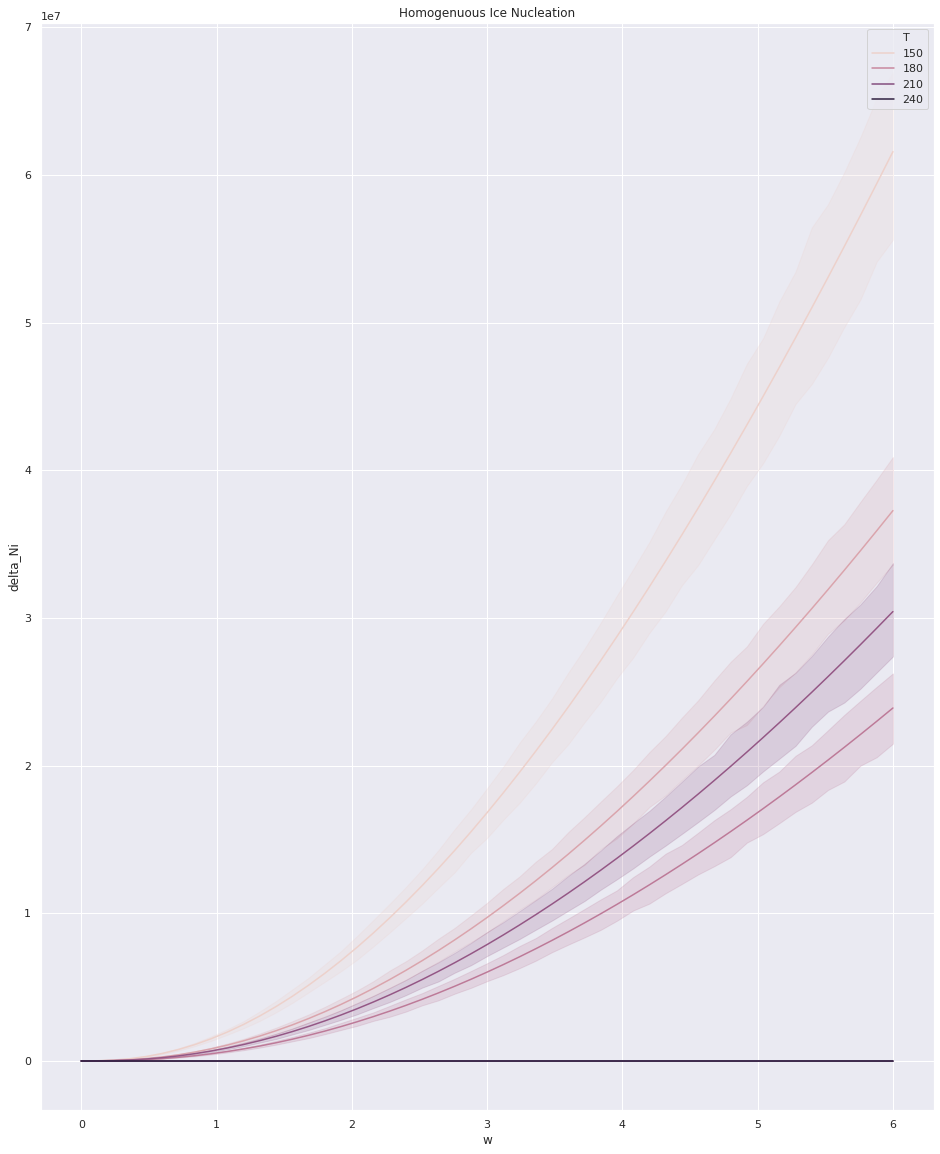

In [6]:
_ = plot_line(
    x="w",
    y="delta_Ni",
    hue="T",
    n1=5,
    n2=50,
    n3=50,
    method="ice_nuc_hom",
    title="Homogenuous Ice Nucleation")

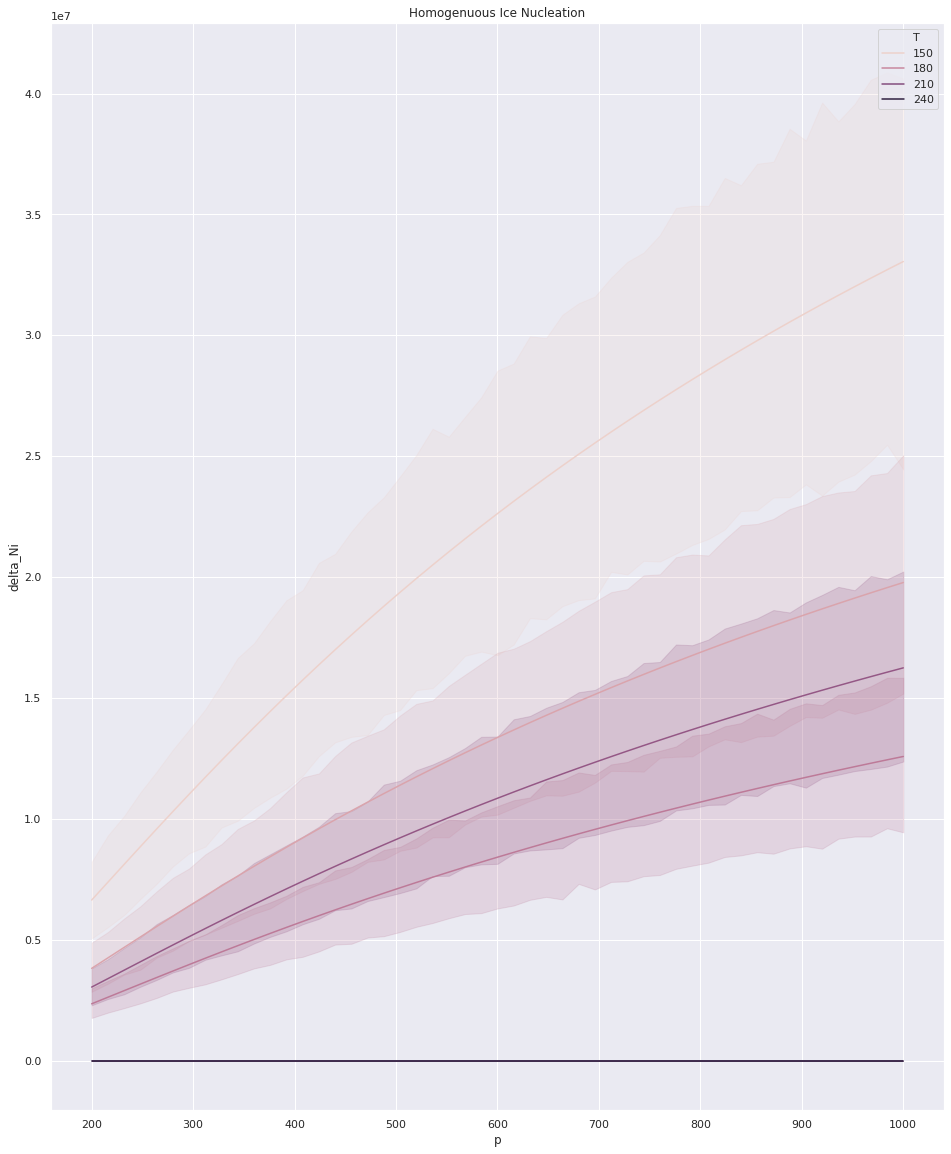

In [7]:
plot_line(
    x="p",
    y="delta_Ni",
    hue="T",
    n1=5,
    n2=50,
    n3=50,
    method="ice_nuc_hom",
    title="Homogenuous Ice Nucleation",
    log=False)

An example using two different units and therefore two colorbars for CCN activation after Hande et al.

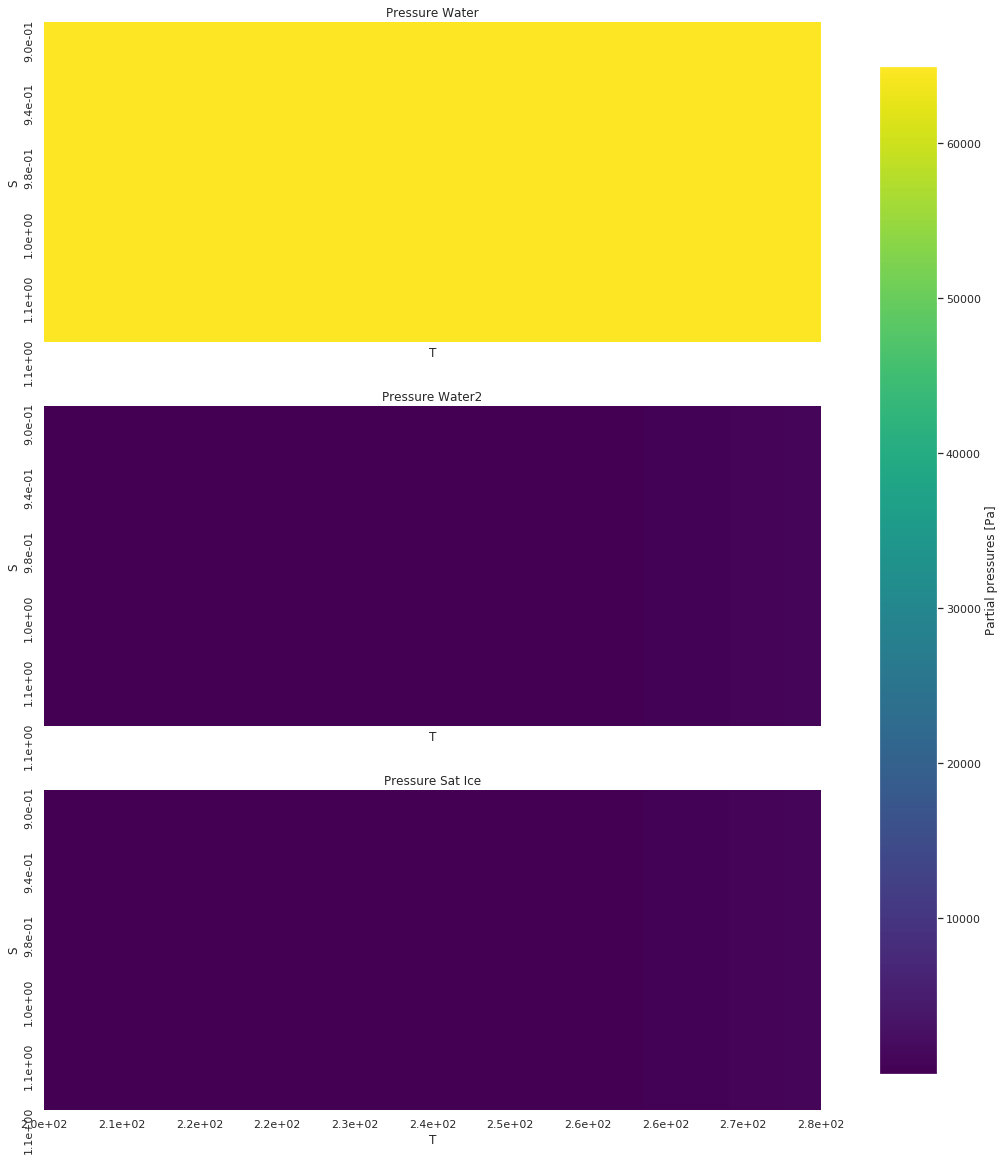

In [39]:
df = plot(
    x="T",
    y="S",
    d1="p",
    d2="p_sat",
    d3="p_sat_vani",
    n1=1000,
    n2=2000,
    n3=0,
    method="pressure_parametrization",
    title1="Pressure Water",
    title2="Pressure Water2",
    title3="Pressure Sat Ice",
    cbar_label1="Partial pressures [Pa]",
    sep_bar=False)

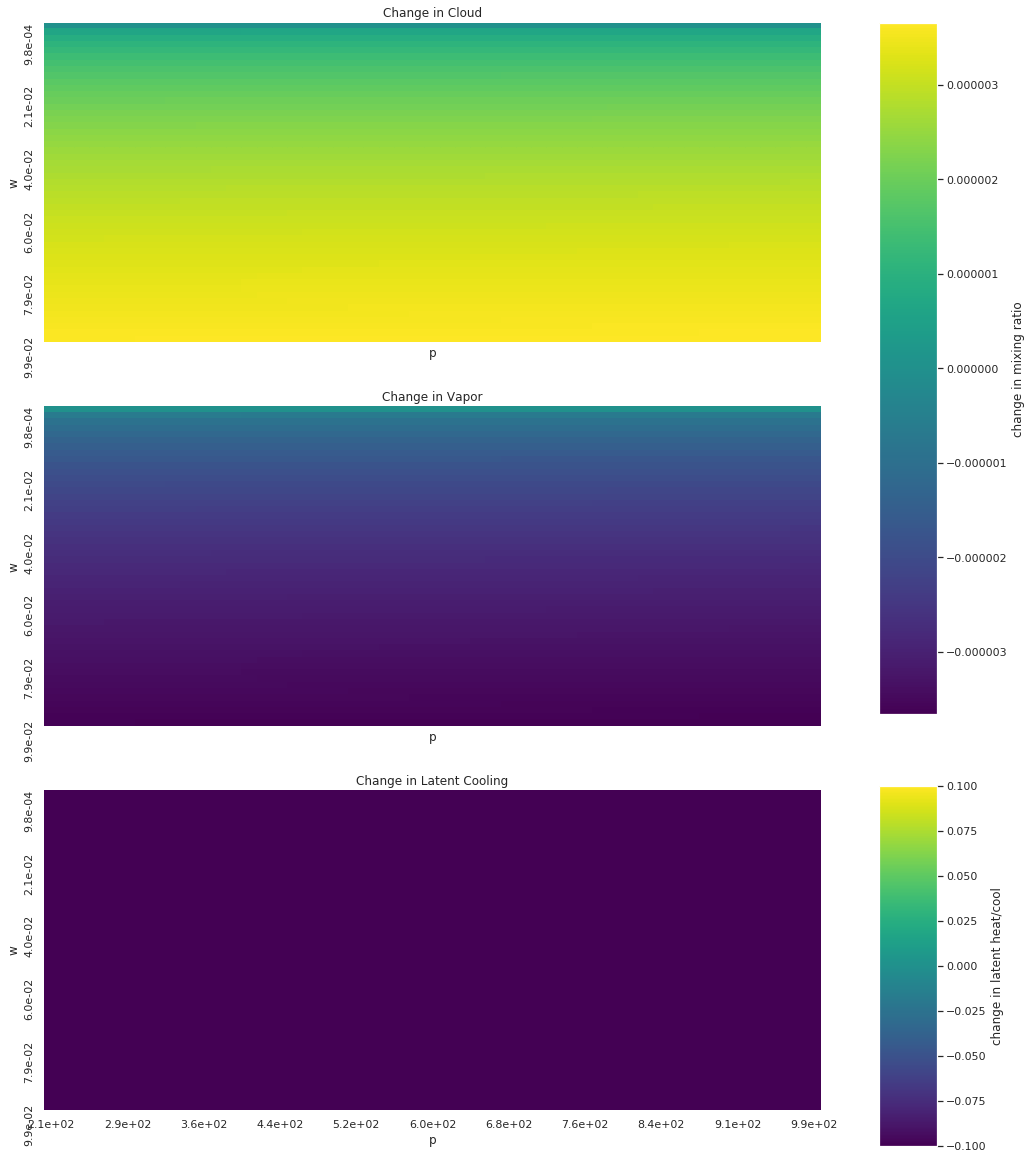

In [8]:
plot(
    x="p",
    y="w",
    d1="delta_qc",
    d2="delta_qv",
    d3="delta_lat_cool",
    n1=50,
    n2=50,
    n3=50,
    method="ccn_act_hande",
    title1="Change in Cloud",
    title2="Change in Vapor",
    title3="Change in Latent Cooling",
    sep_bar=True)

Let's take a look at riming of cloud and rain droplets to hail. Here we only need one colorbar

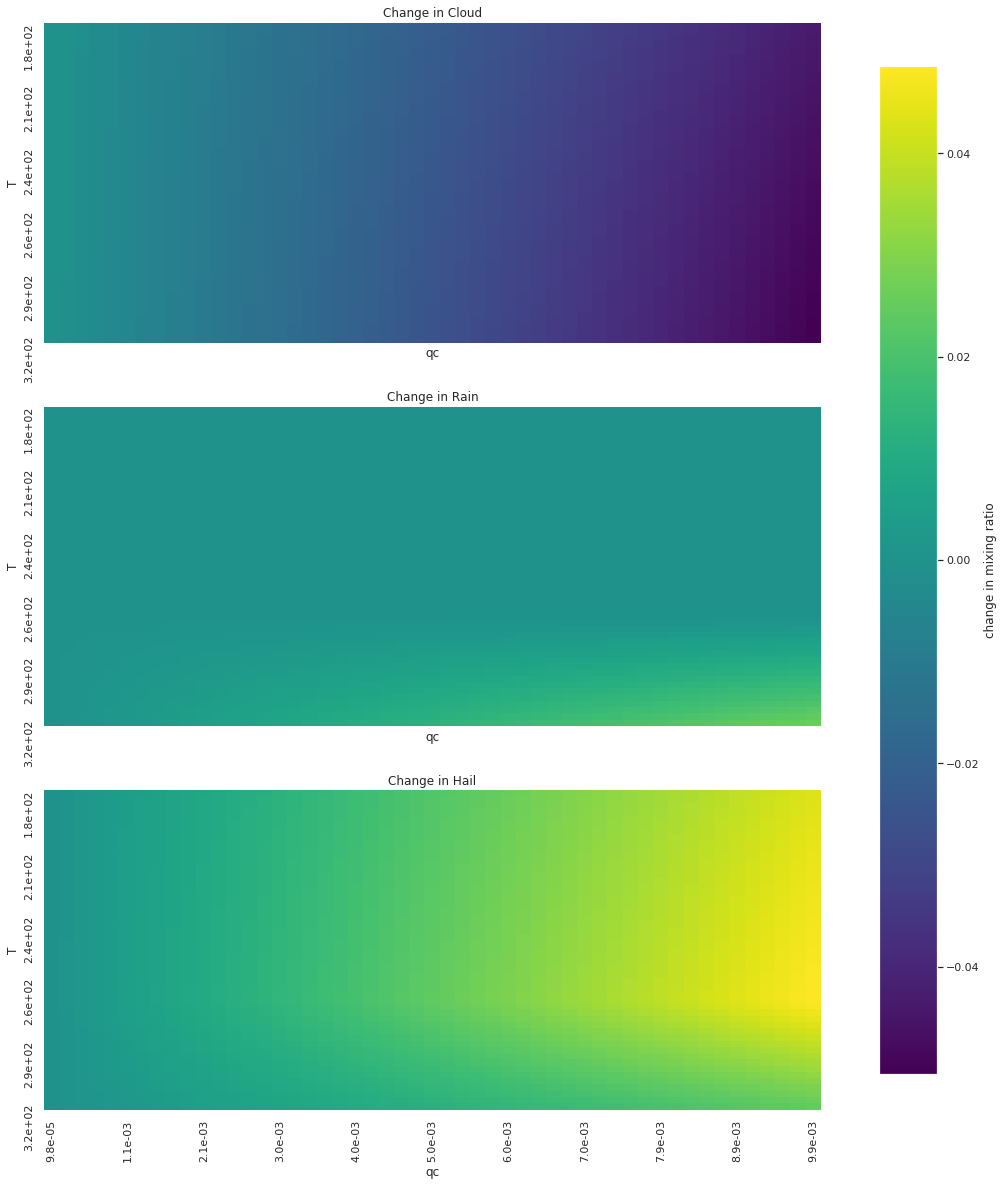

In [9]:
plot(
    x="qc",
    y="T",
    d1="delta_qc",
    d2="delta_qr",
    d3="delta_qh",
    n1=50,
    n2=50,
    n3=50,
    method="particle_cloud_riming",
    title1="Change in Cloud",
    title2="Change in Rain",
    title3="Change in Hail",
    sep_bar=False)

Here an example where you can see correlations between parameters.

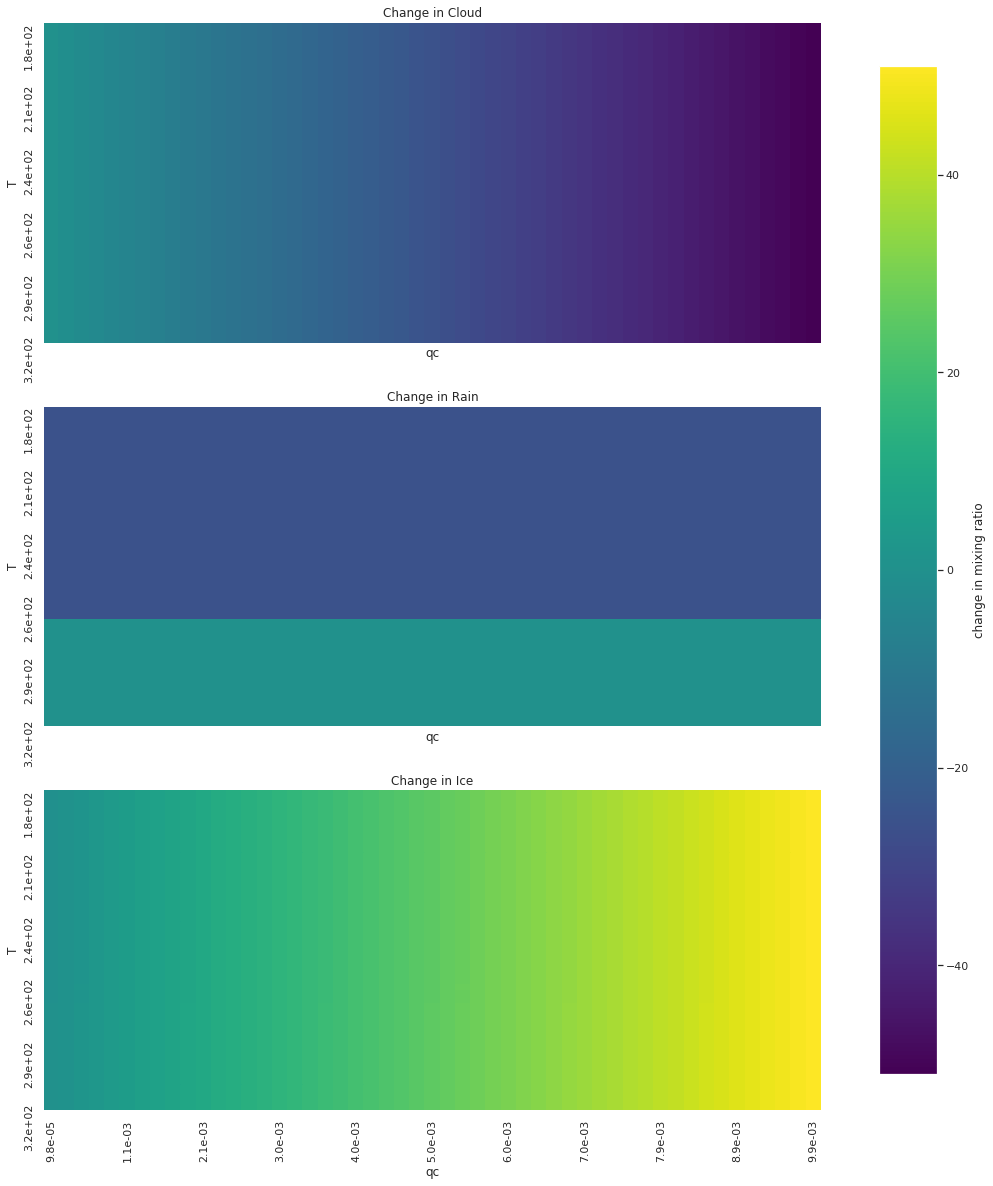

In [10]:
plot(
    x="qc",
    y="T",
    d1="delta_qc",
    d2="delta_qr",
    d3="delta_qi",
    n1=50,
    n2=50,
    n3=50,
    method="ice_riming",
    title1="Change in Cloud",
    title2="Change in Rain",
    title3="Change in Ice",
    sep_bar=False,
    x_format=":.1e")

We can see, that the change of the rain mixing ratio depends on temperature (used at least as a threshold) but not on the cloud mixing ratio, whereas the cloud and ice mixing ratios change with the cloud mixing ratio. If we change the x-axis to rain mixing ratio, the plots would be the other way round, showing large areas of the same color in the upper and lower plots and a gradient of colors in the middle plot.

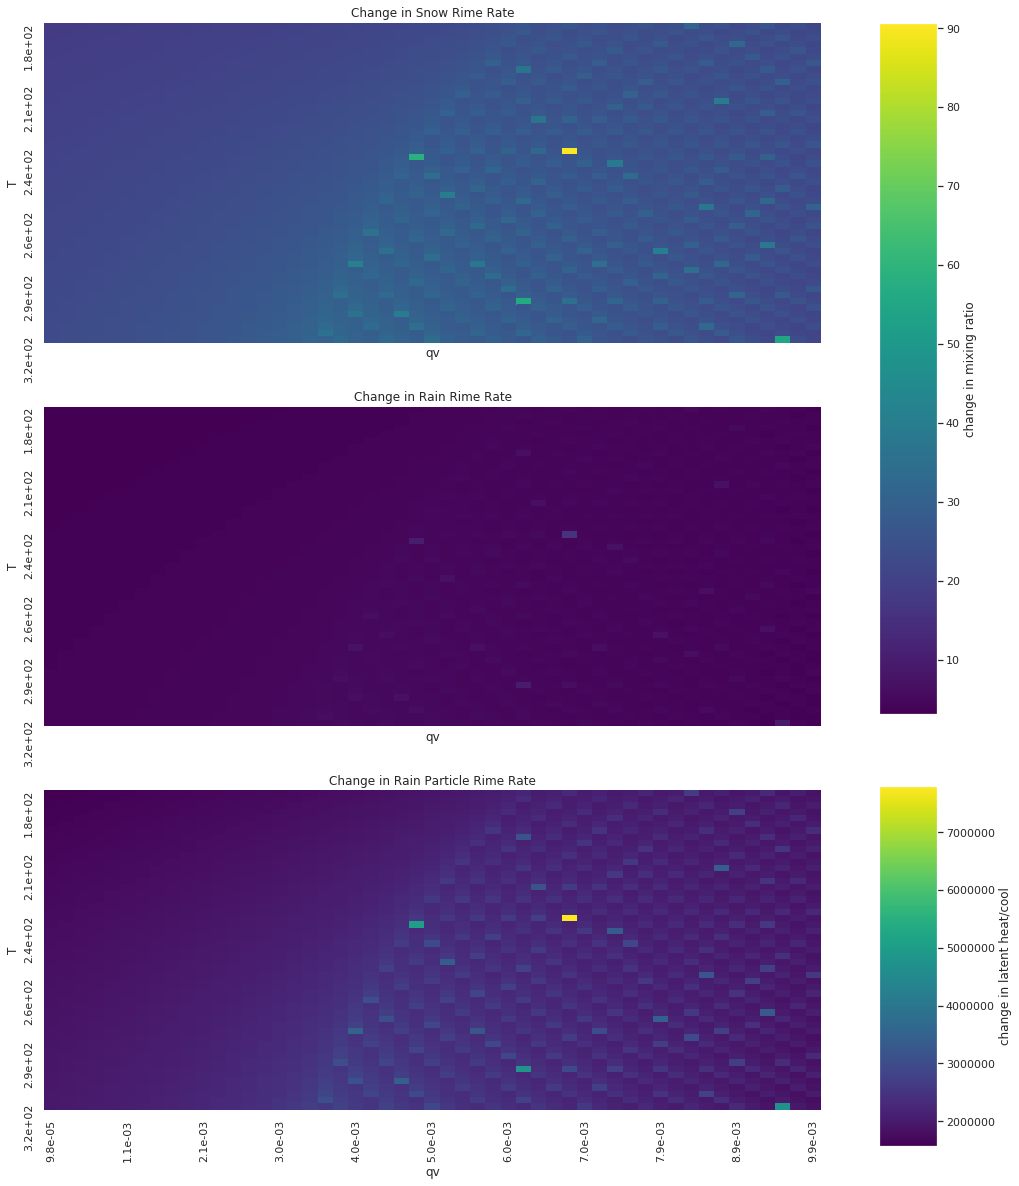

In [11]:
plot(
    x="qv",
    y="T",
    d1="delta_rime_rate_qs",
    d2="delta_rime_rate_qr",
    d3="delta_rime_rate_Nr",
    n1=50,
    n2=50,
    n3=50,
    method="riming_rain_core",
    title1="Change in Snow Rime Rate",
    title2="Change in Rain Rime Rate",
    title3="Change in Rain Particle Rime Rate",
    sep_bar=True,
    x_format=":.1e")

Another example on what happens if some parameters are fixed that are important for processes

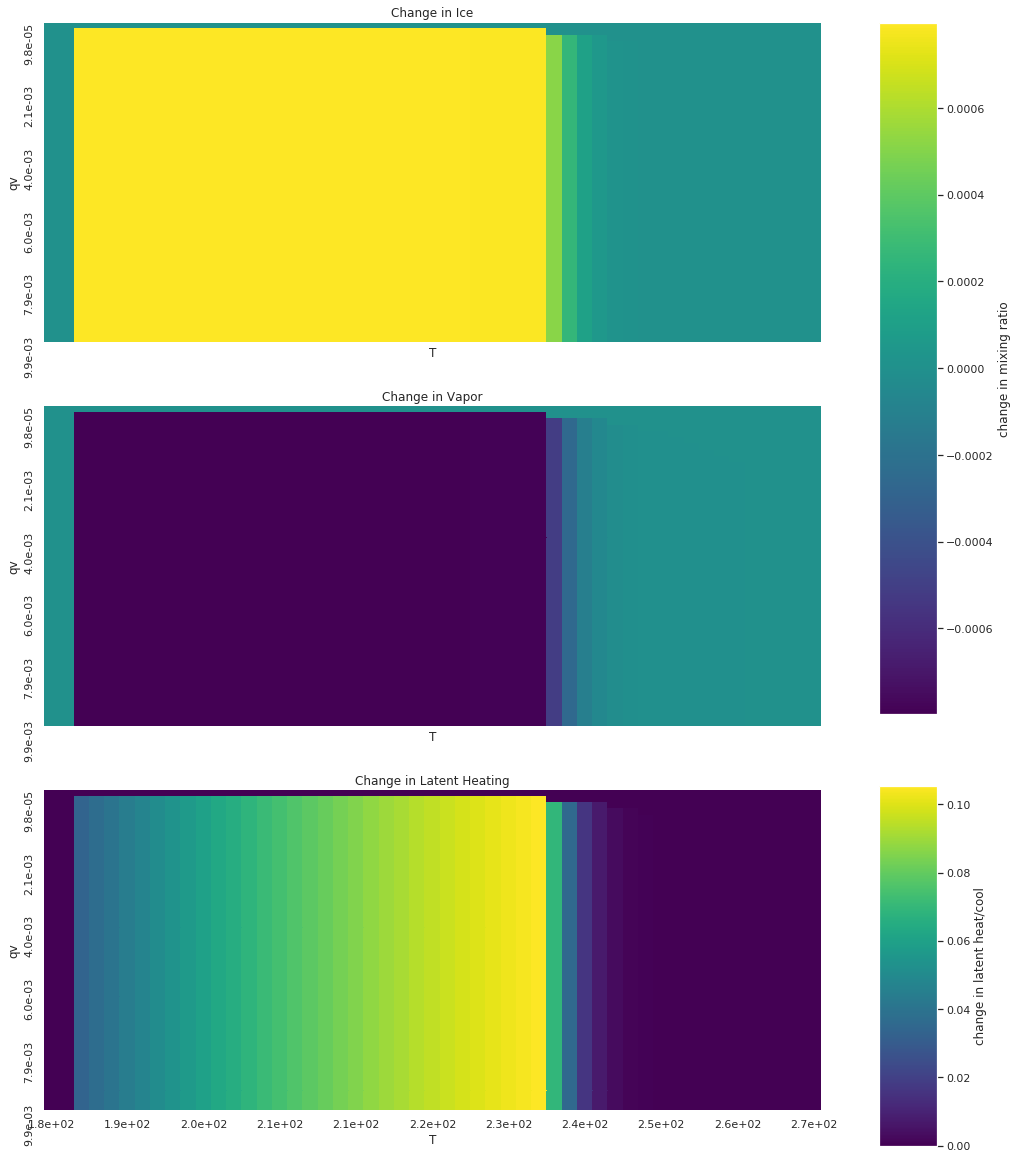

In [12]:
plot(
    x="T",
    y="qv",
    d1="delta_qi",
    d2="delta_qv",
    d3="delta_lat_heat",
    n1=50,
    n2=50,
    n3=50,
    method="ice_activation_hande",
    title1="Change in Ice",
    title2="Change in Vapor",
    title3="Change in Latent Heating",
    sep_bar=True,
    x_format=":.1e")

## Let's examine evaporation of rain droplets

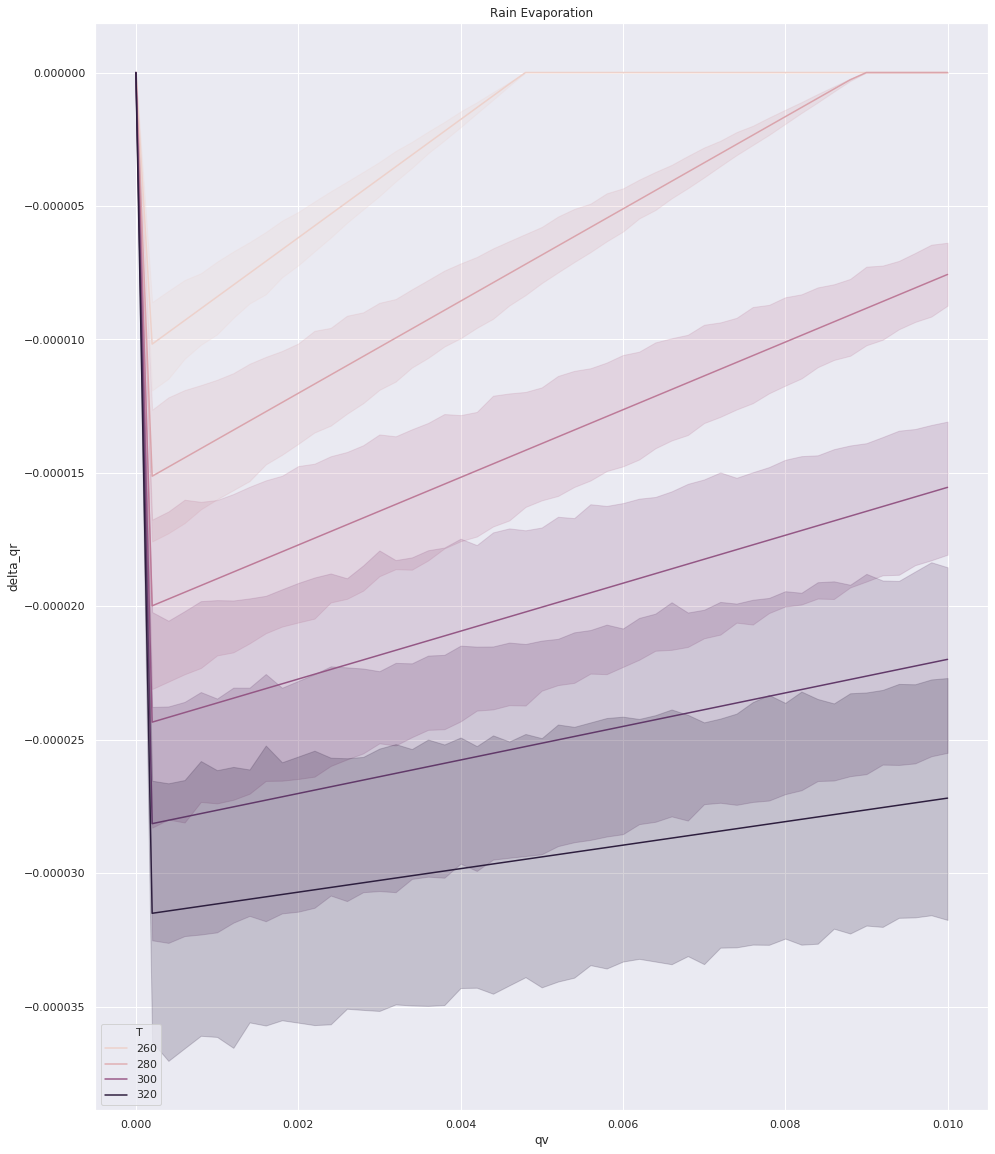

In [11]:
_ = plot_line(
    x="qv",
    y="delta_qr",
    hue="T",
    n1=5,
    n2=50,
    n3=50,
    method="rain_evaporation_sb",
    title="Rain Evaporation")

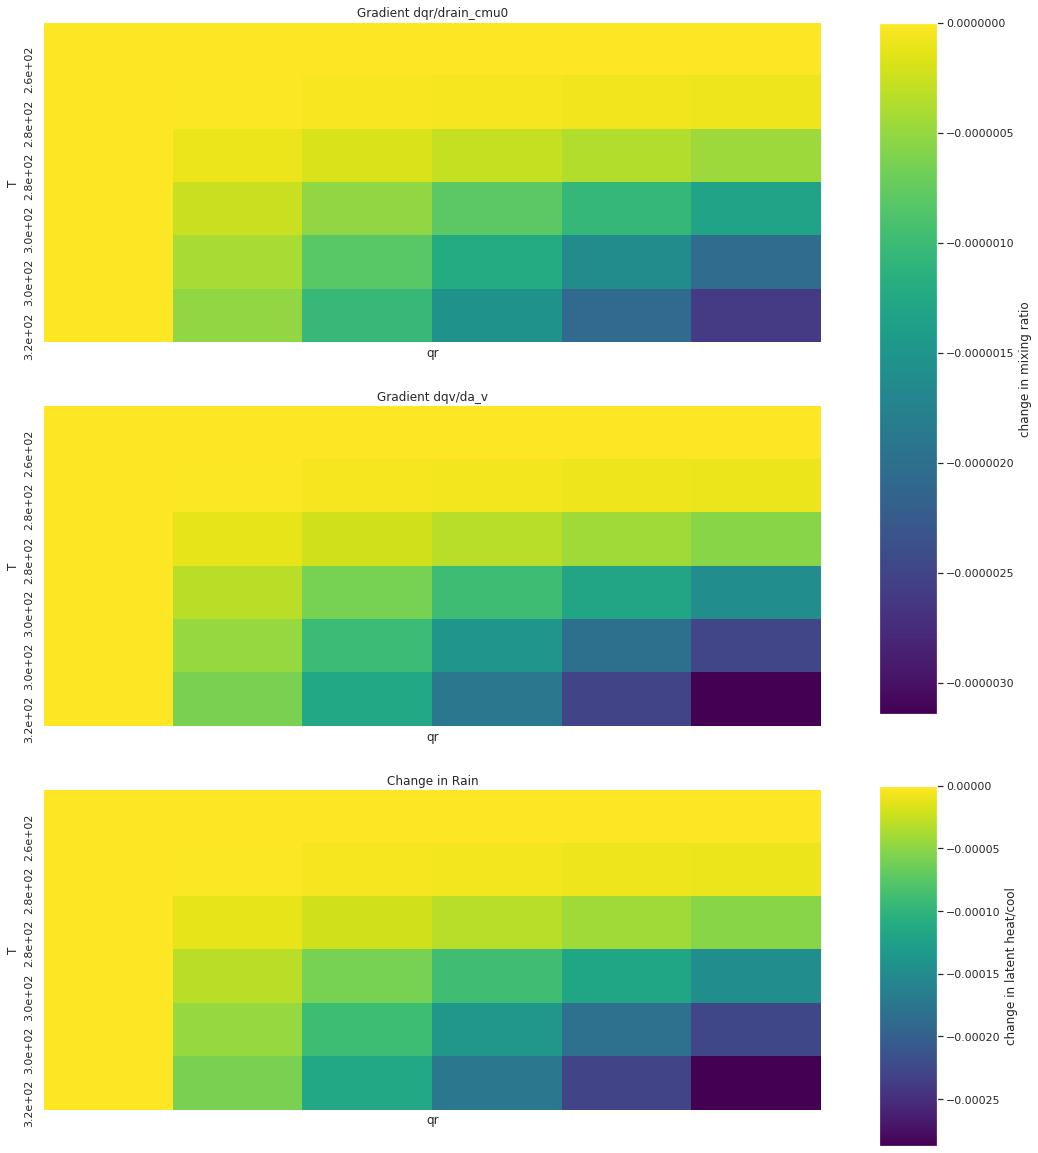

In [91]:
df = plot(
    x="qr",
    y="T",
    d1="dqr/drain_cmu0",
    d2="dqr/da_v",
    d3="delta_qr",
    n1=5,
    n2=5,
    n3=5,
    method="rain_evaporation_sb",
    title1="Gradient dqr/drain_cmu0",
    title2="Gradient dqv/da_v",
    title3="Change in Rain",
    sep_bar=True,
    x_format=":.1e",
    describe=False,
    verbose=False,
    ratio_method="adjusted")

## Interactive Plots
Here are two examples on how to use interactive plots which execute the binary at every change

In [22]:
import os

method_input_param_dic = {
    "ccn_act_hande" : ["qc", "qv", "ascent", "temperature", "pressure"],
    "ccn_act_seifert": ["temperature", "qc", "qv", "ascent", "pressure",
                        "qr", "height"],
    "ice_nuc_hom": ["temperature", "qi", "qv", "ascent", "pressure"],
    "ice_activation_hande": ["temperature", "qc", "qv", "n_inact"],
    "ice_activation_phillips": ["temperature", "qc", "qv", "n_inact"],
    "cloud_freeze_hom": ["temperature", "qc"],
    "ice_self_collection": ["temperature", "qi", "qv", "pressure"],
    "snow_self_collection": ["temperature", "qs", "qv", "pressure"],
    "graupel_melting": ["temperature", "qg", "qv", "pressure"],
    "hail_melting": ["temperature", "qh", "qv", "pressure"],
    "auto_conversion_kb": ["qc", "qr"],
    "auto_conversion_sb": ["temperature", "qc", "qr", "qv", "pressure"],
    "rain_self_collection_sb": ["temperature", "qr", "qv", "pressure"],
    "rain_evaporation_sb": ["temperature", "qr", "qv", "pressure"],
    "sedimentation_explicit": ["qs", "qc", "qi", "qr", "qh", "qg", "qv",
                               "pressure", "temperature"],
    # use either qg, qs or qi!
    "evaporation": ["qg", "qs", "qi", "qv", "pressure", "temperature"],
    "vapor_dep_relaxation": ["qs", "qi", "qh", "qg", "qv", "pressure", "temperature"],
    # Needs ice with hail, snow or graupel or snow with hail or graupel
    "particle_collection": ["qi", "qh", "qs", "qg", "pressure", "temperature", "qv"],
    "particle_particle_collection": ["qs", "qi", "qg", "qv", "pressure", "temperature"],
    "graupel_hail_conv": ["qc", "qi", "qg", "qr", "qh", "pressure", "temperature"],
    "hail_collision": ["qs", "qi", "qh", "qv", "pressure", "temperature"],
    # Needs either qs or qi
    "riming_cloud_core": ["qs", "qi", "qc", "qv", "pressure", "temperature"],
    # Needs either qs or qi
    "riming_rain_core": ["qs", "qi", "qr", "qv", "temperature", "pressure"],
    "ice_riming": ["qc", "qi", "qr", "dep_ice", "rime_qc", "temperature", "rime_qr", "rime_qi"],
    "snow_riming": ["qc", "qs", "qr", "dep_snow", "rime_qc", "temperature",
                    "rime_qr", "rime_qs"],
    # Needs either hail or graupel
    "particle_cloud_riming": ["qg", "qh", "qc", "qv", "temperature", "pressure"],
    # Needs either hail or graupel
    "particle_rain_riming": ["qg", "qh", "qr", "qv", "temperature", "pressure"],
    "rain_freeze": ["temperature", "qr"],
    "ice_melting": ["qi", "temperature"],
    "pressure_parametrization": ["temperature", "saturation"],
}
slider_mapping = {
    "qv": (-10.0, -1.0, 0.25),
    "qc": (-10.0, -1.0, 0.25),
    "qr": (-10.0, -1.0, 0.25),
    "qg": (-10.0, -1.0, 0.25),
    "qh": (-10.0, -1.0, 0.25),
    "qi": (-10.0, -1.0, 0.25),
    "qs": (-10.0, -1.0, 0.25),
    "temperature": (100.0, 270.0, 1.0),
    "pressure": (0.0, 1200.0, 50.0),
    "saturation": (0.0, 1.2, 0.05),
    "height": (0, 20000, 100),
    "ascent": (-10.0, 10.0, 0.2),
    "rime_qc": (0.0, 1.0, 0.01),
    "rime_qr": (0.0, 1.0, 0.01),
    "rime_qi": (0.0, 1.0, 0.01),
    "rime_qs": (0.0, 1.0, 0.01),
    "dep_snow": (0.0, 1.0, 0.01),
    "dep_ice": (0.0, 1.0, 0.01)
}

env = dict(os.environ)
# In case you need to add something to the library path
env['LD_LIBRARY_PATH'] = '/mnt/localscratch/HDF5-1.8.22-Linux/HDF_Group/HDF5/1.8.22/lib:/mnt/localscratch/lib/:/mnt/localscratch/lib:'

In [23]:
method_widget = pn.widgets.Select(
    name="method",
    options=list(method_dic.keys()),
    value="ice_nuc_hom",
)
    
x_widget = pn.widgets.Select(
    name="x",
    options=method_input_param_dic[method_widget.value],
    value=method_input_param_dic["ice_nuc_hom"][0],
)
y_widget = pn.widgets.Select(
    name="y",
    options=method_input_param_dic[method_widget.value],
    value=method_input_param_dic["ice_nuc_hom"][1],
)
hue_widget = pn.widgets.Select(
    name="hue",
    options=method_input_param_dic[method_widget.value],
    value=method_input_param_dic["ice_nuc_hom"][2],
)

n1_widget = pn.widgets.IntSlider(
    name="Number of iterations for x",
    start=2,
    end=200,
    step=1,
    value=10,
)
n2_widget = pn.widgets.IntSlider(
    name="Number of iterations for y",
    start=2,
    end=200,
    step=1,
    value=10,
)
n3_widget = pn.widgets.IntSlider(
    name="Number of iterations for hue",
    start=2,
    end=200,
    step=1,
    value=10,
)

x_slider = pn.widgets.RangeSlider(
    name='X Slider (all sliders for mixing ratios are exponents of 10)', 
    start=slider_mapping[x_widget.value][0], 
    end=slider_mapping[x_widget.value][1], 
    step=slider_mapping[x_widget.value][2],
)
y_slider = pn.widgets.RangeSlider(
    name='Y Slider', 
    start=slider_mapping[y_widget.value][0], 
    end=slider_mapping[y_widget.value][1], 
    step=slider_mapping[y_widget.value][2],
)
hue_slider = pn.widgets.RangeSlider(
    name='Hue Slider', 
    start=slider_mapping[hue_widget.value][0], 
    end=slider_mapping[hue_widget.value][1], 
    step=slider_mapping[hue_widget.value][2],
)

add1_widget = pn.widgets.Select(
    name="Additional parameter 1 if needed",
    options=method_input_param_dic[method_widget.value],
)
add2_widget = pn.widgets.Select(
    name="Additional parameter 2 if needed",
    options=method_input_param_dic[method_widget.value],
)
add3_widget = pn.widgets.Select(
    name="Additional parameter 3 if needed",
    options=method_input_param_dic[method_widget.value],
)
add4_widget = pn.widgets.Select(
    name="Additional parameter 4 if needed",
    options=method_input_param_dic[method_widget.value],
)
add5_widget = pn.widgets.Select(
    name="Additional parameter 5 if needed",
    options=method_input_param_dic[method_widget.value],
)

add1_slider = pn.widgets.FloatSlider(
    name='Slider for additional parameter 1', 
    start=slider_mapping[add1_widget.value][0], 
    end=slider_mapping[add1_widget.value][1], 
    step=slider_mapping[add1_widget.value][2],
)
add2_slider = pn.widgets.FloatSlider(
    name='Slider for additional parameter 2', 
    start=slider_mapping[add2_widget.value][0], 
    end=slider_mapping[add2_widget.value][1], 
    step=slider_mapping[add2_widget.value][2],
)
add3_slider = pn.widgets.FloatSlider(
    name='Slider for additional parameter 3', 
    start=slider_mapping[add3_widget.value][0], 
    end=slider_mapping[add3_widget.value][1], 
    step=slider_mapping[add3_widget.value][2],
)
add4_slider = pn.widgets.FloatSlider(
    name='Slider for additional parameter 4', 
    start=slider_mapping[add4_widget.value][0], 
    end=slider_mapping[add4_widget.value][1], 
    step=slider_mapping[add4_widget.value][2],
)
add5_slider = pn.widgets.FloatSlider(
    name='Slider for additional parameter 5', 
    start=slider_mapping[add5_widget.value][0], 
    end=slider_mapping[add5_widget.value][1], 
    step=slider_mapping[add5_widget.value][2],
)

@pn.depends(method_widget.param.value, watch=True)
def _update_method(method):
    options = method_input_param_dic[method]
    x_widget.options = options
    x_widget.value = options[0]
    y_widget.options = options
    y_widget.value = options[1]
    hue_widget.options = options
    hue_widget.value = options[2]
    add1_widget.options = options
    add1_widget.value = None
    add2_widget.options = options
    add2_widget.value = None
    add3_widget.options = options
    add3_widget.value = None
    add4_widget.options = options
    add4_widget.value = None
    add5_widget.options = options
    add5_widget.value = None
    
title_widget = pn.widgets.TextInput(
    name='Title', 
    placeholder='Enter a title here...',
)
log_x_widget = pn.widgets.Checkbox(
    name="Log x-axis (only for values > 0)", 
    value=False
)
log_y_widget = pn.widgets.Checkbox(
    name="Log y-axis (only for values > 0)",
    value=False,
)

@pn.depends(
    title=title_widget.param.value,
    method=method_widget.param.value,
    x=x_widget.param.value,
    log_x=log_x_widget.param.value,
    y=y_widget.param.value,
    log_y=log_y_widget.param.value,
    hue=hue_widget.param.value,
    n1=n1_widget.param.value,
    n2=n2_widget.param.value,
    n3=n3_widget.param.value,
    x_limits=x_slider.param.value,
    y_limits=y_slider.param.value,
    hue_limits=hue_slider.param.value,
    add1=add1_widget.param.value,
    add2=add2_widget.param.value,
    add3=add3_widget.param.value,
    add4=add4_widget.param.value,
    add5=add5_widget.param.value,
    add1_limits=add1_slider.param.value,
    add2_limits=add2_slider.param.value,
    add3_limits=add3_slider.param.value,
    add4_limits=add4_slider.param.value,
    add5_limits=add5_slider.param.value,
    )
def plot_interact_line(
    title,
    method,
    x,
    log_x,
    y,
    log_y,
    hue,
    n1,
    n2,
    n3,
    x_limits,
    y_limits,
    hue_limits,
    add1,
    add2,
    add3,
    add4,
    add5,
    add1_limits,
    add2_limits,
    add3_limits,
    add4_limits,
    add5_limits,
    ):
    sns.set(rc={'figure.figsize':(16,20)})
    # First we check for some minor inconsistencies
    if x == y or x == hue or y == hue:
        return
    
    def check_limits(name, limits):
        if name[0] == "q" and isinstance(limits, tuple):
            return (10**limits[0], 10**limits[1])
        elif name[0] == "q":
            return 10**limits
        else:
            return limits

    x_limits = check_limits(x, x_limits)
    y_limits = check_limits(y, y_limits)
    hue_limits = check_limits(hue, hue_limits)
    add1_limits = check_limits(add1, add1_limits)
    add2_limits = check_limits(add2, add2_limits)
    add3_limits = check_limits(add3, add3_limits)
    add4_limits = check_limits(add4, add4_limits)
    add5_limits = check_limits(add5, add5_limits)
    # create arguments 
    arguments = []
    def add_argument(name, limits, single_val=False):
        nonlocal arguments

        if name == "pressure":
            if single_val:
                if "pressure" not in arguments and "--p_min" not in arguments:
                    arguments.append("--pressure")
                    arguments.append("{}".format(limits))
            else:
                arguments.append("--p_min")
                arguments.append("{}".format(limits[0]))
                arguments.append("--p_max")
                arguments.append("{}".format(limits[1]))
        elif name == "saturation":
            if single_val:
                if "saturation" not in arguments and "--S_min" not in arguments:
                    arguments.append("--saturation")
                    arguments.append("{}".format(limits))
            else:
                arguments.append("--S_min")
                arguments.append("{}".format(limits[0]))
                arguments.append("--S_max")
                arguments.append("{}".format(limits[1]))
        elif name == "temperature":
            if single_val:
                if "temperature" not in arguments and "--temp_min" not in arguments:
                    arguments.append("--temperature")
                    arguments.append("{}".format(limits))
            else:
                arguments.append("--temp_min")
                arguments.append("{}".format(limits[0]))
                arguments.append("--temp_max")
                arguments.append("{}".format(limits[1]))
        else:
            if single_val:
                if name not in arguments and f"--{name}_min" not in arguments:
                    arguments.append(f"--{name}")
                    arguments.append("{}".format(limits))
            else:
                arguments.append("--" + name + "_min")
                arguments.append("{}".format(limits[0]))
                arguments.append("--" + name + "_max")
                arguments.append("{}".format(limits[1]))
    add_argument(x, x_limits)
    add_argument(y, y_limits)
    add_argument(hue, hue_limits)
    add_argument(add1, add1_limits, True)
    add_argument(add2, add2_limits, True)
    add_argument(add3, add3_limits, True)
    add_argument(add4, add4_limits, True)
    add_argument(add5, add5_limits, True)

    # Read data
    completed = sb.run(
        ["build/apps/src/scratch/scan", "--function", method, 
         "--n1", "{}".format(n1), "--n2", "{}".format(n2), "--n3", "{}".format(n3)] 
        +  arguments,
        capture_output=True,
        encoding="utf-8",
        env=env)

    df = pd.read_csv(StringIO(completed.stdout), sep=",")
    for column in df.columns:
        if "/" in column:
            in_p = column.split("/")[1]
            # As if we perturb it by 10% for consistency with paper
            df[column] = df[column].mul(
                latexify.in_params_numeric_value_dic[in_p] * 0.1) 

    cmap = "viridis"    
    
    def check_name(v):
        if v == "ascent":
            return "w"
        if v == "temperature":
            return "T"
        if v == "Saturation":
            return "S"
        return v
    x = check_name(x)
    y = check_name(y)
    hue = check_name(hue)

    return df.hvplot(
            x=x,
            y=y,
            width=1000,
            kind="scatter",
            groupby=[hue],
            alpha=0.3,
            logx=log_x,
            logy=log_y,
        )

widgets = pn.WidgetBox(
    title_widget,
    method_widget,
    x_widget,
    log_x_widget,
    x_slider,
    y_widget,
    log_y_widget,
    y_slider,
    hue_widget,
    hue_slider,
    n1_widget,
    n2_widget,
    n3_widget,
    add1_widget,
    add1_slider,
    add2_widget,
    add2_slider,
    add3_widget,
    add3_slider,
    add4_widget,
    add4_slider,
    add5_widget,
    add5_slider,
)

In [24]:
app = pn.Column(pn.Column(widgets, width=600), plot_interact_line)
app

Column
    [0] Column(width=600)
        [0] WidgetBox
            [0] TextInput(name='Title', placeholder='Enter a title here...')
            [1] Select(name='method', options=['ccn_act_hande', ...], value='ice_nuc_hom')
            [2] Select(name='x', options=['temperature', ...], value='temperature')
            [3] Checkbox(name='Log x-axis (only f...)
            [4] RangeSlider(end=270.0, name='X Slider (all s..., start=100.0, step=1.0, value=(100.0, 270.0))
            [5] Select(name='y', options=['temperature', ...], value='qi')
            [6] Checkbox(name='Log y-axis (only f...)
            [7] RangeSlider(end=-1.0, name='Y Slider', start=-10.0, step=0.25, value=(-10.0, -1.0))
            [8] Select(name='hue', options=['temperature', ...], value='qv')
            [9] RangeSlider(end=-1.0, name='Hue Slider', start=-10.0, step=0.25, value=(-10.0, -1.0))
            [10] IntSlider(end=200, name='Number of iterations f..., start=2, value=10)
            [11] IntSlider(end=200, name='Number of iterations f..., start=2, value=10)
            [12] IntSlider(end=200, name='Number of iterations f..., start=2, value=10)
            [13] Select(name='Additional parameter 1..., options=['temperature', ...], value='temperature')
            [14] FloatSlider(end=270.0, name='Slider for additional p..., start=100.0, step=1.0, value=100.0)
            [15] Select(name='Additional parameter 2..., options=['temperature', ...], value='temperature')
            [16] FloatSlider(end=270.0, name='Slider for additional p..., start=100.0, step=1.0, value=100.0)
            [17] Select(name='Additional parameter 3..., options=['temperature', ...], value='temperature')
            [18] FloatSlider(end=270.0, name='Slider for additional p..., start=100.0, step=1.0, value=100.0)
            [19] Select(name='Additional parameter 4..., options=['temperature', ...], value='temperature')
            [20] FloatSlider(end=270.0, name='Slider for additional p..., start=100.0, step=1.0, value=100.0)
            [21] Select(name='Additional parameter 5..., options=['temperature', ...], value='temperature')
            [22] FloatSlider(end=270.0, name='Slider for additional p..., start=100.0, step=1.0, value=100.0)
    [1] ParamFunction(function)